# Instruktioner för användning av Python i Jupyter

I den här filen har vi samlat något av det viktigaste vad gäller Pythons användning och olika funktioner som kan vara till nytta när man sätter igång. Vi har satt med en del exempel på hur de ska användas.

Angående dokumentet: För att koden i dokumentets celler ska fungera måste du först köra cellen i **avsnitt 2**, där vi importerar alla funktionspaket.

Om du inte minns hur du ska använda jupyter notebook, tryck **h** utan att ha någon cell öppen. Då öppnas en hjälpmeny med alla snabbkommandon du behöver.

1. Grundbegrepp
2. Paket
3. Datatabeller och -hantering
4. Grundläggande räknefunktioner
5. Skapa slumpdata
6. Rita grafer
7. Skapa animationer
8. Kartor och täthetskartor
9. Problem? Se hit!

### 1. Grundbegrepp

I programmering kan man spara olika värden i **variabler**. Variablerna kan användas eller ändras senare. Olika typer av variabler är t.ex. heltal, *int*, flyttal (decimaltal), *float*, eller teckensträng, *string*. I python är det lätt att skapa variabler, eftersom man inte behöver definiera variabelns typ.

Koden körs med hjälp av programmets kärna, **kernel**, och ibland kan bitar av information stanna i kerneln och störa koden. Det händer nu och då, men ingen panik. Välj i så fall *kernel* i menyn ovan, och därefter *restart & clear output*. Då rensas de processer som ligger kvar i minnet, och du kan börja om från början. Det här påverkar inte några ändringar du har gjort i text eller kod.

### 2. Paket

Python är ett programmeringsspråk anpassat för vetenskapliga beräkningar, och innehåller många funktioner som är optimerade med beräkningar i åtanke. Python bygger till stor del på användningen av *paket* eller *funktionsbibliotek*. Dessa paket kan man ladda in med hjälp av **import**-kommandot, och fastän det till en början kan låta mystiskt och svårt att veta vilka paket man behöver, så klarnar det så småningom. 

Om du tar en titt på materialet som OpenData-projektet erbjuder, så märker du att varje GitHub-mapp innehåller en textfil "requirements.txt", som t.ex. [MyBinder](www.mybinder.org) kan använda för att bygga upp en grund för Jupyter. Där ser man att våra viktigaste paket är följande:

In [2]:
# De mest använda paketen:

import pandas as pd   # Pandas innehåller verktyg för att läsa in och behandla data
import numpy as np   # Numpy innehåller verktyg för beräkningar, så som trigonometriska funktioner och värdet på pi
import matplotlib.pyplot as plt  # Pyplot innehåller verktyg för grafisk presentation av data; diagram och grafer.

# Andra användbara paket:

import random as rand   # Random innehåller funktioner för slumpgeneratorer
from scipy import stats    # Används för vetenskapliga beräkningar och statistik.
from scipy.stats import norm    # Normalfördelningsverktyg
import matplotlib.mlab as mlab  # Grafverktyg för mer mångsidiga grafer.

Kom ihåg att köra cellen ovan om du vill att den här notebookens exempel ska fungera. Du kan se att vi har förkortat några av paketens namn med hjälp av **as**-kommandot. Det är inte nödvändigt, men det kan förkorta och förenkla koden i cellerna som följer. Om du vill läsa mer om paketen, klicka på *Help* i menyn ovan, så hittar du länkar för paketens dokumentation och noggrannare användningsanvisningar.

Det finns massor av paket utöver dem som nämns här, och man kan vanligen hitta passande paket med hjälp av google. Tack vare Pythons stora användarskara hittas tusentals exempel och instruktioner på internet. [StackExchange](https://stackexchange.com/) och [StackOverflow](https://stackoverflow.com/) är bra hemsidor att söka svar på.

### 3. Datatabeller och -hantering

**Kommandon:**

Läsa in en csv-fil $\rightarrow$ 
``` Python 
namn = pd.read_csv('filens sökväg', konfigurationsargument)

```  
Läsa in en tabell $\rightarrow$ 
``` Python
pd.read_table('filens sökväg', konfigurationsargument)
``` 
Kontrollera innehåll $\rightarrow$ 
``` Python
name.head(n)
# Visar de n första raderna i tabellen "name", så att du kan få en översikt över innehållet
``` 
Längden av en tabell $\rightarrow$ 
``` Python
len(name)  
# Du kan t.ex. kontrollera antalet rader i tabellen genom kommandot print(len(namn)).
``` 
Form $\rightarrow$ 
``` Python
name.shape 
# Kommandot anger tabellens dimensioner som (antalrader, antalkolumner)
``` 
Alla värden ur en kolumn $\rightarrow$ 
``` Python
name.column 
name['column']
# "column" byts ut mot kolumnens rubrik
``` 
Intervallbegränsning $\rightarrow$ 
``` Python
name[(name.column >= nedre_gräns) & (name.column <= övre_gräns)]  
# Kolumnen får endast innehålla värden.
``` 
Textsökning $\rightarrow$ 
``` Python
name['column'].str.contains('sökfras')  
``` 
Lägg till en kolumn $\rightarrow$ 
``` Python
name = name.assign(nya_kolumnens_namn = nya_kolumnens_innehåll) 
``` 
Ta bort kolumner $\rightarrow$ 
``` Python
name.drop(['column1','column2'...], axis = 1)
``` 




CMS-experimentets OpenData-filer är i .csv-format. *CSV = Comma Separated Values*. Sådan information är lätt att läsa in som en tabell med hjälp av *pandas*-paketet. Då skapas en tvådimensionell tabell, även kallad DataFrame. Mer information hittas [här](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Där finns även en lista på enkla ändringar som kan göras till den inlästa datan.

De lättaste sätten att läsa in data och börja använda den är **pd.read_csv** och **pd.read_table**. Om datan är prydlig (separerad med kommatecken, inkluderar rubriker, innehåler inga svårtolkade specialtecken...) behövs inget mer än det.

In [3]:
# Vi laddar in ett set med partikeldata till vår variabel och bestämmer ett valfritt namn på den:

tvillingmyoner = pd.read_csv('../Data/Dimuon_DoubleMu.csv')

# Om du vill använda en direkt url istället, använd den här: 'http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv'
# Variabler i Python kan inte innehålla å, ä, ö, och kan inte börja med en siffra, exempelvis "2myoner".

Det här kommandot söker en fil i samma filsystem som denna notebook. **../** tar oss till mappen ovanför, och därifrån navigerar vi in i parallellmappen **Data** och filen **Dimuon_DoubleMu.csv**. Du kan också hämta filen direkt med en url om du inte har sparat filen själv.

Om Datan är i en annan textform kan man testa det mer allmänna **pd.read_table**-kommandot, som också förstår andra typer av tabellerad text. Det vanligaste problemet är att värdena är separerade med något annat än kommatecken, så som *tab* eller semikolon. I så fall kan man använda **pd.read_csv(../Data/Dimuon_DoubleMu.csv, sep = ';')** där parametern *sep =* anger separationstecknet. Ett annat vanligt problem är att tabellen börjar på fel rad eller att kolumnernas rubriker är någon annanstans än på första raden. Det kan åtgärdas med parametern **header = n**, där n är ordningstalet för den rad där rubrikerna hittas. OBS! Inom programmering börjar ordningstalen från 0 om inget annat specificeras.

Närmare information angående användbara parametrar hittas [här](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). 

Nedan finns ett exempel på data som saknar kolumnrubriker. Datan visar observationer av solfläckar sedan år 1992, och mer information om t.ex. kolumnernas betydelse hittas [här](http://sidc.oma.be/silso/infosndhem).

In [4]:
# Vi laddar in filen med soldata:

soldata = pd.read_table('http://sidc.oma.be/silso/INFO/sndhemcsv.php', sep = ';', encoding = "ISO-8859-1")

För tydlighetens skull ter vi en titt på hur vår data ser ut. Här passar kommandot **name.head(n)**, som visar de n första raderna av den valda datan. Om inget n specificeras, visas de 5 första raderna.

In [5]:
tvillingmyoner.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


In [6]:
soldata.head()

,1992,01,01.1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1.1,1
0,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
1,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
2,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
3,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1
4,1992,1,6,1992.015,245,79,166,18.7,10.6,15.4,14,-1,-1,1


**tvillingmyoner**-tabellen ser bra utt, men vi ser att **soldata**-variabelns första riktiga rad har blivit satt som rubrik för kolumnerna. Detta är dåligt eftersom 1) vi har dåliga namn för kolumnerna, och 2) En rad av data har gått förlorad, eftersom den inte räknas in i tabellen.

Vi åtgärdar problemet. Eftersom tabellen inte innehåller någon rubrik kan vi lägga till parametern **header = None** (kom ihåg att bokstavsstorleken har betydelse; "none" fungerar inte.). Då räknas alla värden till tabellen, och i brist på givna rubriker gör programmet bara en numrering istället.

In [7]:
soldata = pd.read_table('http://sidc.oma.be/silso/INFO/sndhemcsv.php', sep = ';', encoding = "ISO-8859-1", header = None
                       )

In [8]:
soldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1992,1,1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1,1
1,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
2,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
3,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
4,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1


Om vi vill göra rubriceringen mer tydlig, så kan vi namnge kolumnerna med parametern **names = ['namn1','namn2','namn3']**.

In [9]:
soldata = pd.read_table('http://sidc.oma.be/silso/INFO/sndhemcsv.php', sep=';', encoding = "ISO-8859-1", header = None, 
names = ['År','Månad','Dag','Fraktion','$P_{tot}$','$P_{nord}$','$P_{syd}$','$\sigma_{tot}$','$\sigma_{nord}$',
         '$\sigma_{syd}$','$N_{tot}$','$N_{nord}$','$N_{syd}$','Prov'])

# Lägg märke till att alla argument finns inom samma långa parentes, även om vi byter rad för tydlighetens skull.

In [10]:
soldata.head()

,År,Månad,Dag,Fraktion,$P_{tot}$,$P_{nord}$,$P_{syd}$,$\sigma_{tot}$,$\sigma_{nord}$,$\sigma_{syd}$,$N_{tot}$,$N_{nord}$,$N_{syd}$,Prov
0,1992,1,1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1,1
1,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
2,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
3,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
4,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1


Utöver **name.head()**-kommandot kan man också kontrollera datans form med hjälp av följande: **len(name)** anger antalet rader eller variabelns längd, och **name.shape** anger radernas och kolumnernas antal.

In [11]:
# Vanligen innehåller cellens output bara information om den sista operationen.
# Om man vill visa information från flera operationer kan man använda print()-kommandot.
# Du kan testa vad som händer om du tar bort "print" från operationerna nedan.


print (len(soldata))
print (soldata.shape)

10652
(10652, 14)


Nu har vi all data i en läslig form, och kan börja rensa ur den information vi behöver. Oftast är vi intresserade av någon specifik variabel i datan. Vi ska här se hur man kan plocka ut enstaka kolumner eller rader ur datan. 

Man kan välja ut en kolumn genom att skriva **name.column** eller **name['column']**. Man måste använda hakparentesversionen av kommandot om kolumnens namn börjar med en siffra. För att hålla ordning i koden kan det löna sig att ge den här kolumnen ett eget namn. Vi gör den alltså till en egen variabel: **kolumnvariabel = name.column**. Detta ger även den fördelen att mindre data behöver hanteras på samma gång, vilket kan underlätta datorns arbete.

In [12]:
# Vi skiljer ut kolumnen M, innehållande myonernas invarianta massa, och gör den till en ny variabel.

iMassa = tvillingmyoner.M

In [13]:
iMassa.head()

0    17.4922
1    11.5534
2     9.1636
3    12.4774
4    14.3159
Name: M, dtype: float64

Vi kan också välja ett urval av rader genom att bestämma gränser för någon variabel i tabellen. Exempelvis:


``` Python
NewName = name[(name.column >= undre_gräns) & (name.column <= övre_gräns)]
```


In [14]:
# Som exempel skiljer vi ut de rader i myondatan, där bägge partiklarnas energi är minst 30 GeV.

over30 = tvillingmyoner[(tvillingmyoner.E1 >= 30) & (tvillingmyoner.E2 >= 30)]

In [15]:
over30.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
21,165617,74969122,G,59.9226,-46.1516,29.4115,-24.4070,54.7266,-0.4324,2.5742,...,G,52.4465,30.1097,-16.3989,-39.6876,34.2859,-0.9885,-0.4987,-1,89.9557
36,165617,75138253,G,97.1011,-23.6144,6.6660,-93.9497,24.5372,-2.0524,2.8665,...,G,30.5992,-11.6134,-25.9848,11.2347,28.4619,0.3851,-1.9911,1,88.6081
46,165617,75887636,G,152.9720,7.4657,-30.7098,-149.6710,31.6042,-2.2593,-1.3323,...,G,33.5835,-9.2878,28.7457,-14.6719,30.2089,-0.4684,1.8833,1,88.2438
78,165617,75833588,G,181.8770,44.1427,-14.9498,175.8040,46.6055,2.0379,-0.3265,...,G,170.0210,-34.6301,12.3248,166.0000,36.7579,2.2128,2.7997,-1,83.0943
110,165617,75779415,G,50.2440,37.8072,-12.2044,-30.7590,39.7283,-0.7124,-0.3122,...,G,49.2396,-47.6064,8.2338,-9.5061,48.3132,-0.1955,2.9703,-1,90.3544


In [16]:
print (len(over30))
print (len(tvillingmyoner))

6516
100000


Om man vill överföra flera hela kolumner till en ny variabel kan man skriva:

``` python
nyVariabel = name[['column1', 'column2', ...]]
```

Man kan också söka text, exempelvis med **name.loc[ ]**-funktionen.
Den kräver att man vet exakt vad man söker.
 
``` Python 
nyvariabel = gammalvariabel.loc[gammalvariabel['kolumn'] == 'sökfras']
```

Om man inte vet exakt vad man söker kan man också söka utgående från en delfras med hjälp av **contains**-funktionen.

``` Python
nyvariabel = gammalvariabel[gammalvariabel['kolumn'].str.contains('sökfras')]
```

Kommandot skapar en ny variabel som innehåller de rader där kolumnen "kolumn" innehåller sökordet. Det är skillnad på stora/små bokstäver, men det kan också åtgärdas med en parameter:

tekee uuden muuttujan, jossa on nyt haetun pätkän sisältäneet rivit. Oletusarvoisesti toiminto välittää kirjainkoosta, mutta sen voi laittaa pois päältä kirjoittamalla 
``` Python
nyvariabel = gammalvariabel[(gammalvariabel['kolumn'].str.contains('sökfras'), case = False)]
```

Lägg märke till att **str.contains()** är en logisk operation, som svarar True/False på frågan. I koden nedan sållar vi bort alla företag vars namn innehåller Oy eller Oyj ur en lista över finska alkoholtillverkare. Koden tar även bort namn som börjar på Oy-, så man kan behöva kontrollera en extra gång.

In [17]:
tillverkare = pd.read_csv('http://avoindata.valvira.fi/alkoholi/alkoholilupa_valmistus.csv', sep = ';', encoding = "ISO-8859-1", na_filter = False)

In [18]:
tillverkare.head()

,Y-Tunnus,Nimi,Luvan alkupvm,Olut,Viini,Hedelmäviini,Tislatut alkoholijuomat,Väkiviina,Käsityöläisoluen vähittäismyyntilupa,Tilaviinin vähittäismyyntilupa
0,0107011-5,Berner Oy,03.02.2014,,,,,X,,
1,0170318-9,Olvi Oyj,17.02.1995,X,,X,X,,,
2,0171079-2,Alahovin Viinitila Oy,25.02.1995,X,X,X,X,,,X
3,0171110-3,Oy Gust. Ranin Lignell & Piispanen,20.01.1995,,,X,X,,,
4,0193088-3,Kakslauttanen Arctic Resort Oy,25.02.2020,X,,,,,,


In [19]:
# Här använder vi funktionen .str.contains() som alltid ger True/False, och rensar ur de fall där den ger False.

utanOy = tillverkare[tillverkare['Nimi'].str.contains('Oy') == False]
print (len(tillverkare))
print (len(utanOy))


196
34


Om du vill lägga till eller ta bort kolumner används funktionerna **name = name.assign(newcolumn = nyakolumnensinnehåll)** och **name.drop(['column1','column2'...], axis = 1)**. Här är parametern **axis** viktig, eftersom den instruerar kommandot att ta bort kolumner.

In [20]:
# Exempel: Ta bort kolumner med .drop
# Man borde kunna skriva tillverkare.drop-kommandot direkt, men det fungerar inte alltid.
# Därför definierar vi variabeln 'tillverkare' på nytt:

tillverkare = tillverkare.drop(['Nimi'], axis = 1)
tillverkare.head()

,Y-Tunnus,Luvan alkupvm,Olut,Viini,Hedelmäviini,Tislatut alkoholijuomat,Väkiviina,Käsityöläisoluen vähittäismyyntilupa,Tilaviinin vähittäismyyntilupa
0,0107011-5,03.02.2014,,,,,X,,
1,0170318-9,17.02.1995,X,,X,X,,,
2,0171079-2,25.02.1995,X,X,X,X,,,X
3,0171110-3,20.01.1995,,,X,X,,,
4,0193088-3,25.02.2020,X,,,,,,


In [21]:
# Exempel: Lägga till kolumner med .assign
# Vi vill skapa en kolumn R, som innehåller siffror.
# Det är viktigt att den nya kolumnen innehåller samma antal värden som de andra.

tallinje = np.linspace(0, 100, len(tillverkare))

# np.linspace skapar här en serie siffervärden med jämna mellanrum från 0 till 100.
# Antalet siffervärden bestäms av len(tillverkare)
 
tillverkare = tillverkare.assign(R = tallinje)
tillverkare.head()


,Y-Tunnus,Luvan alkupvm,Olut,Viini,Hedelmäviini,Tislatut alkoholijuomat,Väkiviina,Käsityöläisoluen vähittäismyyntilupa,Tilaviinin vähittäismyyntilupa,R
0,0107011-5,03.02.2014,,,,,X,,,0.000000
1,0170318-9,17.02.1995,X,,X,X,,,,0.512821
2,0171079-2,25.02.1995,X,X,X,X,,,X,1.025641
3,0171110-3,20.01.1995,,,X,X,,,,1.538462
4,0193088-3,25.02.2020,X,,,,,,,2.051282


### 4. Grundläggande räknefunktioner och syntaxlogik.

**Sammanfattning:**

Addition $\rightarrow$ 
``` python
x + y 
``` 
Subtraktion $\rightarrow$
```  python
x - y  
``` 
Division $\rightarrow$
```  python
x/y  
``` 
Multiplikation $\rightarrow$
``` python
x*y  
``` 
Potens $\rightarrow$ 
```  python
x**y  
``` 
Absolutbelopp $\rightarrow$ 
``` Python
abs(x)  
``` 
Kvadratrot $\rightarrow$
```  Python
np.sqrt(x)   # Om du har importerat 'numpy as np' 
math.sqrt(x) # Om du har importerat 'math'
``` 
Största värde $\rightarrow$
```  python
max(x)  
``` 
Minsta värde $\rightarrow$ 
```  python
min(x)  
``` 
Avrundning $\rightarrow$ 
```  python
round(x,2)   # Avrundar x till 2 decimalers noggrannhet
round(x)     # Avrundar x till ett heltal
``` 

Skapa en egen funktion $\rightarrow$ 
```  python
def name(input):
    funktion
    
``` 


De grundläggande räkneoperationerna är inte överraskande. De används likadant i python som i de flesta räknare eller räkneprogram. Om man vill att programmet ska skriva ut resultaten vart efter man räknar är det bra att använda **print()**-kommandot. 
[Den här](https://docs.python.org/3/library/functions.html) praktiska listan visar en del funktioner som finns inbyggda i Python redan innan man lägger till några paket. Där hittas funktioner som söker största eller minsta värden, avrundar tal, etc. Om den listan inte räcker till hittar man mer [här](https://docs.python.org/3/library/stdtypes.html).

In [22]:
# Du kan använda variabler för att anteckna räkneoperationer.
# Pröva själv att byta ut startvärdena a och b här. Hela räkneoperationen fungerar utgående från dem.

a = 4
b = 6

pythagoras = np.sqrt(a**2 + b**2)

text1 = 'Hypotenusans längd är: '
print (text1, pythagoras)

text2 = 'Vi avrundar: '
print (text2, round(pythagoras, 2))

Hypotenusans längd är:  7.211102550927978
Vi avrundar:  7.21


In [23]:
# Max() plockar ut det största värdet ur en mängd.

massasiffror = [3,6,12,67,578,2,5,12,-34]

print('Det största talet är ' + repr(max(massasiffror)))
print('Det största talet är',max(massasiffror))

# Kommandot repr() omvandlar ett värde till en teckensträng. Det är ett alternativt sätt att skriva ut variabler.

Det största talet är 578
Det största talet är 578


Räkneoperationer går ganska snabbt att förstå. Om man ska upprepa samma räkneoperationer i sin kod kan man förkorta koden genom att skapa en egen funktion för dem. Så här kan vi **definiera** en egen funktion: 

``` Python
def funktionensnamn(input):  
    funktionens innehåll
```

In [24]:
# def 
# Vi skapar en funktion för att beräkna pythagoras sats.
# Funktionen 'hypotenusa' behöver två värden, kateternas längder

def hypotenusa(a,b):
    print(np.sqrt(a**2 + b**2))

# Sedan kan vi använda funktionen med ett kort kommando. Funktionen kan användas upprepade gånger.    
    
hypotenusa(1, 2)
hypotenusa(1, 3)
hypotenusa(1, 4)

2.23606797749979
3.1622776601683795
4.123105625617661


In [25]:
# input
# Vi gör ett program som frågar kateternas längd av användaren
# och beräknar hypotenusans längd utgående från dem.

def hypotenusa(a, b):
    hyp = np.sqrt(a**2 + b**2)
    meddelande = 'kateterna {} och {} ger hypotenusan {}.'.format(a, b, round(hyp,2))
    print(meddelande)

def Valbarhet():
    katet1 = float(input("Ge den ena katetens längd: "))    # kommandot input låter användaren sätta in ett värde.
    katet2 = float(input("Ge den andra katetens längd: "))  # float / flyttal är formatet för decimaltal.
    hypotenusa(katet1, katet2)

    
# Sedan är det bara att aktivera funktionen:    
Valbarhet() 

Ge den ena katetens längd: 2
Ge den andra katetens längd: 3
kateterna 2.0 och 3.0 ger hypotenusan 3.61.


In [26]:
# while
# Vi skapar en funktion som kan ta in en lista med värden och utföra en räkneoperation på dem.
# Vi använder en while-loop för att upprepa räkneoperationen för varje element i listan.

def kvadrera(a):
    i=0                  # vi skapar ordningstalet i för att räkna elementen i listan
    while i < len(a):    # instruerar while-loopen att fortsätta tills vi har räknat genom listan
        a[i] = a[i]**2   # utför en räkneoperation på elementet med ordningstalet i
        i+=1             # ökar ordningstalet innan vi upprepar loopen. Detta är ett kortare sätt att skriva i = i+1
    return a;            # ger tillbaka input-listan med nya värden.

tallista = [5,2,4,2,1,3] 
kvadrera(tallista)
print(tallista)

[25, 4, 16, 4, 1, 9]


In [27]:
# Vi kan göra samma sak med hjälp av en for-loop istället:

def kvadrera(a):
    for i in range(0, len(a)):   # range-kommandot räknar upp alla tal mellan 0 och len(a). Övre gränsen exkluderad.
        a[i] = a[i]**2           #   Ex: range(0,3) = (0, 1, 2). 
    return a;
    
tal = [1,2,3,5,6]
kvadrera(tal)
print(tal)

[1, 4, 9, 25, 36]


### 5. Skapa slumpdata

**Sammanfattning:**


Funktionspaket för slumpberäkningar:
``` python
import random as rand 
```


Slumpmässigt heltal $\rightarrow$ 
``` python
rand.randint(undregräns,övregräns)
``` 
Slumptal mellan 0 och 1 $\rightarrow$ 
``` python
rand.random()  
``` 
Slumpmässigt urval av givna alternativ $\rightarrow$
``` python
rand.choices(mängd_alternativ, sannolikhetsvikter, k = antal)  
``` 
slumpmässigt urval ur en population $\rightarrow$ 
``` python
rand.sample(mängd_alternativ, k = antal)  
``` 
Normalfördelning $\rightarrow$
``` python
rand.normalvariate(väntevärde, varians)  
``` 
Skapa en jämnt fördelad talmängd $\rightarrow$ 
``` python
np.linspace(start, slut, num = antal element)  
np.arange(start, slut, stegstorlek)
``` 


Ibland är det intressant att köra verkliga data tillsammans med simuleringar eller slumpvärden. [Monte Carlo -simulationer](https://sv.wikipedia.org/wiki/Monte_Carlo-metod) är lite överkurs i det här sammanhanget, men vi ska se på några användningsområden för slumptal. Kom ihåg att vanliga slumpgeneratorer är *pseudo-randomized*, och använder sig av deterministiska processer. Det är alltså inte bra att använda dem för att skapa bankkoder eller säkerhetstal.  

In [28]:
# Vi skapar ett slumpmässigt heltal i ett intervall

vinstlott = rand.randint(1,100)
text = 'Dagens vinnande lott är: '
print (text + repr(vinstlott))

Dagens vinnande lott är: 69


In [29]:
# Vi skapar ett slumptal mellan 0 och 1 och multiplicerar med 6

tal = rand.random()*6
print (tal)

3.8587299286454915


In [30]:
# Vi väljer namn från en lista, men vissa namn är mer sannolika än andra.

namnlista = ['Benjamin', 'Jonas', 'Viktor', 'Fanny', 'Linnéa', 'Emilia', 'Jonatan']
vikter = [10,30,20,50,5,5,20]

# VI bestämmer hur många namn vi vill välja. k = antal. .choices-funktionen kan välja samma namn flera gånger.

namn = rand.choices(namnlista, weights = vikter, k = 3)
print(namn)

['Jonatan', 'Viktor', 'Benjamin']


In [31]:
# Samma urval utan vikter och utan möjlig upprepning:

namnlista = ['Benjamin', 'Jonas', 'Viktor', 'Fanny', 'Linnéa', 'Emilia', 'Jonatan']

namn = rand.sample(namnlista, k = 3)
print (namn)

['Jonas', 'Emilia', 'Linnéa']


In [32]:
# Slumptal från en given normalfördelning (väntevärde, varians)

tal = rand.normalvariate(3, 0.1)
print (tal)

3.0243538356449804


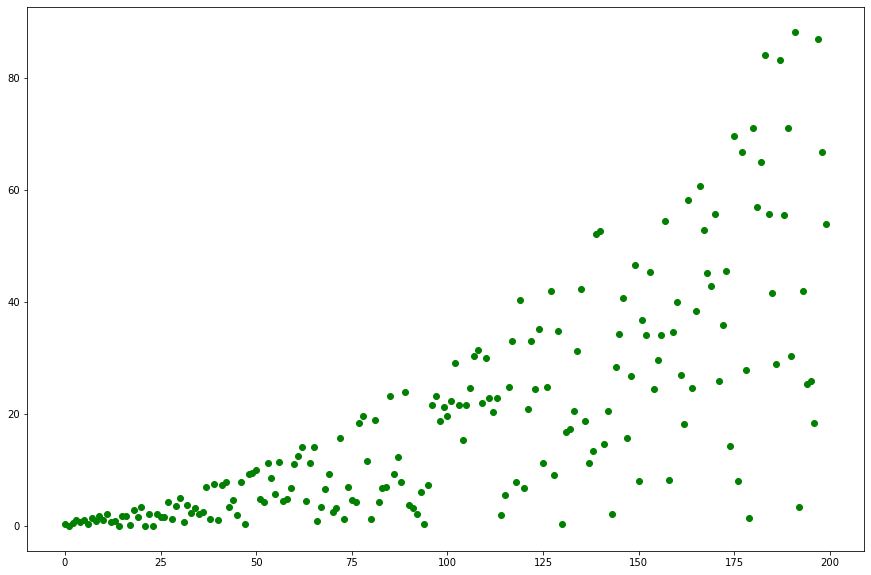

In [33]:
# Vi skapar en jämnt fördelad talserie på 200 element mellan 1 och 10

talserie = np.linspace(1, 10, 200)

def slumpfunktion(a):
    b = a.copy()                          # Vi kopierar a för att inte ändra på den
    
    for i in range(0,len(b)):             # for-loop: För varje värde b[i] i serien, 
        b[i] = b[i]*rand.uniform(0,b[i])  # multiplicera det med ett slumptal mellan 0 och b[i].
    return b;

resultat = slumpfunktion(talserie)        # Vi sätter in talserien med 200 element i funktionen

                                          # Vi sätter in resultaten i en graf
fig = plt.figure(figsize=(15, 10))        # Denna rad bestämmer grafbildens storlek
plt.plot(resultat,'go')                   # Denna rad bestämmer grafens innehåll. 'g*' betyder gröna stjärnor
plt.show()                                # Denna rad behövs för att grafen ska visas

In [34]:
# Ett annat sätt att bilda en jämnt fördelad talserie [a,b[ är np.arange(a,b,c) där c är stegstorleken. 
# För denna funktion rekommenderas att c är ett heltal. Lägg märke till att b inte hör till serien.

serie = np.arange(1,10,1)
print(serie)

[1 2 3 4 5 6 7 8 9]


# 6. Att rita grafer

**Sammanfattning:**

Hämta in rätt verktyg $\rightarrow$
``` python
import matplotlib.pyplot as plt
``` 


Simpel graf $\rightarrow$
``` python
plt.plot(talserie, 'färg och markör')

#'färg och markör' kan vara t.ex 'ro' för röda bollar, 'b*' för blå stjärnor eller 'k.' för svarta punkter.
# Detta kommando ritar talseriens värden på y-axeln och värdets ordningstal på x-axeln.
``` 
Scatter plot $\rightarrow$
``` python
plt.scatter(x-data, y-data, marker = 'markör', color = 'färg')
``` 
Histogram $\rightarrow$
``` python
plt.hist(namn, antal_staplar, range = (start, slut))
``` 
Visa förklaringsfält (kräver parametern label = 'namn') $\rightarrow$
``` python
plt.legend()
``` 
Visa de ovan bestämda graferna i samma fönster $\rightarrow$
``` python
plt.show()
``` 
Anpassa en normalfördelning till datan $\rightarrow$
``` python
(mu, sigma) = norm.fit(namn)
# Detta definierar värden för variablerna mu (väntevärde) och sigma (varians)
...
``` 
Grafens bildstorlek och axlarnas namn $\rightarrow$
``` python
plt.xlabel('xaxelnsnamn')
plt.ylabel('yaxelnsnamn')
plt.title('grafenstitel')
fig = plt.figure(figsize=(bredd, höjd))

```
Inkludera felberäkningar $\rightarrow$
```python
plt.errorbar(värde1, värde2, xerr = fel1, yerr = fel2, fmt = 'none')
```


Grafer är kanske den viktigaste orsaken att använda programmering i undervisningen. även de största datasets kan åskådliggöras med rätt grafer. Här kommer vi att gå igenom några vanliga sätt att skapa dem.

Grafernas färger och markörer kan fritt bytas ut. [Här](https://matplotlib.org/api/markers_api.html?highlight=markers#module-matplotlib.markers) hittar du en lista på olika markörbeteckningar som känns igen.

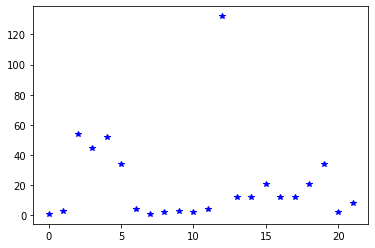

In [35]:
# Här skapar vi en enkel graf med plot-funktionen. Om vi bara anger en rad med information, 
#   anges x-värdet automatiskt av värdenas ordningstal.

siffror = [1,3,54,45,52,34,4,1,2,3,2,4,132,12,12,21,12,12,21,34,2,8]
plt.plot(siffror, 'b*')

# På slutet sätter vi in plt.show(). Jypyter kan visa grafen även om du inte skriver in det,
#   men bilden blir bättre och koden tydligare om vi har med det.

#plt.show()

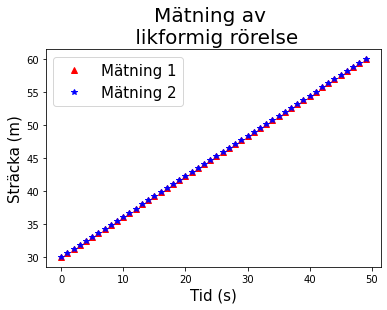

In [36]:
# Det är bra att namnge graferna, så att läsaren vet vad de betyder. Här ser du hur man kan namnge de olika delarna:


# Vi skapar två slumpmässiga datasets för att ha något att rita.

dataset1 = np.linspace(10, 20, 50)*rand.randint(2,5)
dataset2 = np.linspace(10, 20, 50)*rand.randint(2,5)

# Vi ritar in båda i en graf.
# parametern label = ' ' namnger graferna.

plt.plot(dataset1, 'r^', label = 'Mätning 1')
plt.plot(dataset2, 'b*', label = 'Mätning 2')

# Vi namnger koordinataxlarna och väljer en rubrik för grafen.
# Fontsie-parametern är inte nödvändig, men kan vara till nytta för att göra texten tydlig.

plt.xlabel('Tid (s)', fontsize = 15)
plt.ylabel('Sträcka (m)', fontsize = 15)
plt.title('Mätning av \n likformig rörelse', fontsize = 20) # \n skapar en ny rad. 

# Vi lägger till en förklaringsruta, "legend". Den visar de namn som vi tidigare
# definierade med label-parametern. loc-parametern (location) är inte nödvändig.

plt.legend(loc='upper left', fontsize = 15)

# Till sist visar vi grafen med plt.show()

plt.show()

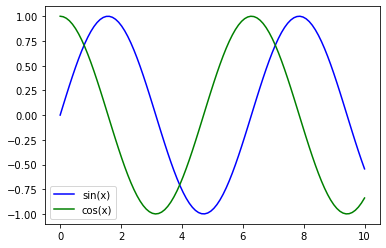

In [37]:
# Trigonometriska funktioner går också att rita fint.

# Vi skapar en tallinje med x-värden:

x = np.linspace(0, 10, 100)

# Vi definierar funktionerna som ska ritas.

y1 = np.sin(x)
y2 = np.cos(x)

# Sedan ritar vi graferna. Det är viktigt att x- och y-koordinaternas datasets är lika stora, annars blir det ingen graf.

plt.plot(x, y1, color = 'b', label = 'sin(x)')
plt.plot(x, y2, color = 'g', label = 'cos(x)')

plt.legend()

plt.show()

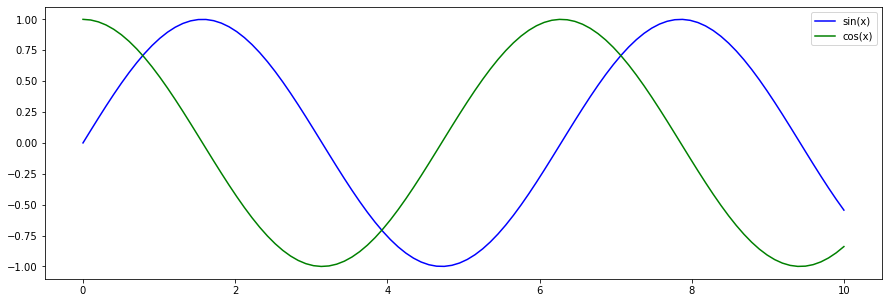

In [38]:
#Graferna blir automatiskt ganska små i Jupyter. Använd figsize-kommandot för att själv bestämma grafens storlek.

# Vi upprepar den föregående grafen:

x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.cos(x)

# Nu väljer vi grafens storlek. Det första argumentet är bredd, det andra höjd.

fig = plt.figure(figsize=(15, 5))

plt.plot(x, y1, color = 'b', label = 'sin(x)')
plt.plot(x, y2, color = 'g', label = 'cos(x)')

plt.legend()

plt.show()

En annan grundläggande typ av graf är [scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). En scatterplot ritar upp variabelpar som punkter, och är mycket vanlig för att presentera mätdata t.ex. inom fysik.

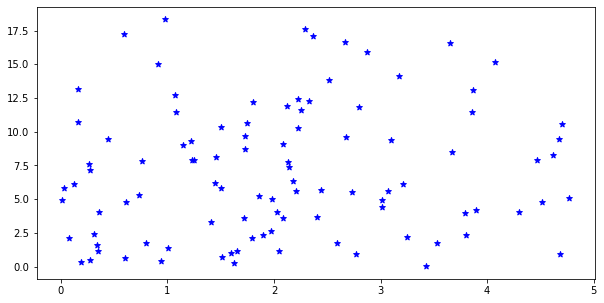

In [39]:
def slumpprogram(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.uniform(0,1)
    return b;

# Vi skapar slumpmässig data, där vårt ena dataset rör sig mellan 0 och 5 och vårt andra mellan 0 och 20.

dataset1 = slumpprogram(np.linspace(3,5,100))
dataset2 = slumpprogram(np.linspace(10,20,100))

fig = plt.figure(figsize=(10,5))
plt.scatter(dataset1, dataset2, marker ='*', color = 'b')
plt.show()

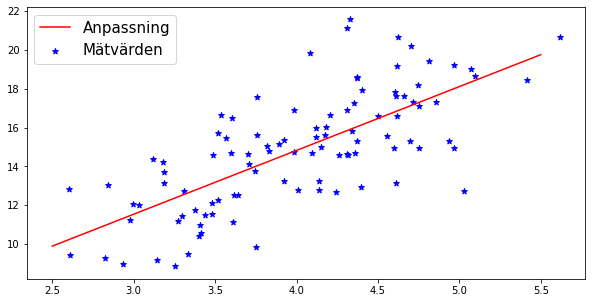

In [40]:
# Vi skapar en ny scatterplot och använder en normalfördelningsfunktion för att slumpmässigt sprida värdena  

def norm_slumpa(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.normalvariate(1, 0.1)
    return b;

dataset1 = norm_slumpa(np.linspace(3,5,100))
dataset2 = norm_slumpa(np.linspace(10,20,100))

fig = plt.figure(figsize=(10,5))
plt.scatter(dataset1, dataset2, marker ='*', color = 'b', label = 'Mätvärden')

# Vi testar också att anpassa en linje till punkterna

slope, intercept, r_value, p_value, std_err = stats.linregress(dataset1, dataset2)

# stats.linregress(a, b)-kommandot anpassar en linje till en scatterplot baserad på variablerna a och b.
# informationen om linjen sparas i variablerna till vänster. De två första är de mest intressanta.

# I linjens ekvation y = kx + b, är slope = k och intercept = b.
# r_value är ett mått på korrelation, p_value är onödigr komplicerat att förklara här och std_err är en felberäkning.

x = np.linspace(2.5, 5.5, 100)  # Skapar x-värden för linjen - en tallinje med 100 tal från 2.5 till 5.5

plt.plot(x, intercept + slope*x, 'r', label='Anpassning')

plt.legend(fontsize = 15)
plt.show()

# Om du vill veta matematiska värden för grafen kan du t.ex skriva print(slope) eller liknande.

Histogram (stapeldiagram) är ett annat viktigt sätt att avbilda data. Histogram hittas på många områden, bl.a. partikelfysik, medicin och statsvetenskap.

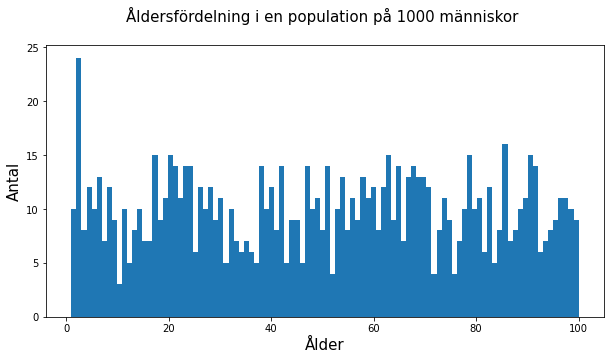

In [41]:
# Vi skapar en slumpmässig åldersfördelning och gör ett histogram baserat på den.

def aldersgenerator(a):
    b = a.copy()
    for i in range(0, len(b)):
        b[i] = b[i]*rand.randint(1,100)
    return b;

alder = aldersgenerator(np.ones(1000)) # np.ones(1000) skapar en mängd bestående av 1000 ettor.
                                # funktionen aldersgenerator multiplicerar varje etta med ett slumptal mellan 1 och 100.

fig = plt.figure(figsize = (10,5))
plt.hist(alder, bins = 100, range = (1,100)) # plt.hist skapar ett histogram över ett givet dataset.
                                             # parametern bins anger antalet staplar, och range anger start och slut.

plt.xlabel('Ålder', fontsize = 15)
plt.ylabel('Antal', fontsize = 15)
plt.title('Åldersfördelning i en population på %i människor \n' %(len(alder)), fontsize = 15 ) 

plt.show()

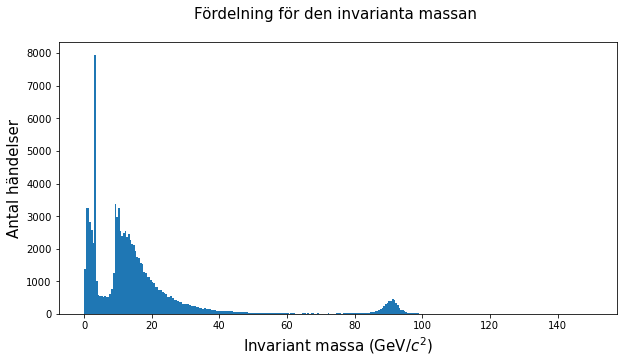

In [42]:
# Det är dags att vi använder verklig data igen. Vi läser in data från partikelkollisioner:

tvillingmyoner = pd.read_csv('../Data/Dimuon_DoubleMu.csv')

# Vi ritar ett histogram över kolumn M, invariant massa.

fig = plt.figure(figsize = (10,5))
plt.hist(tvillingmyoner.M, bins = 300, range = (0,150))

plt.xlabel('Invariant massa (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Antal händelser', fontsize = 15)
plt.title('Fördelning för den invarianta massan \n', fontsize = 15 ) 

plt.show()

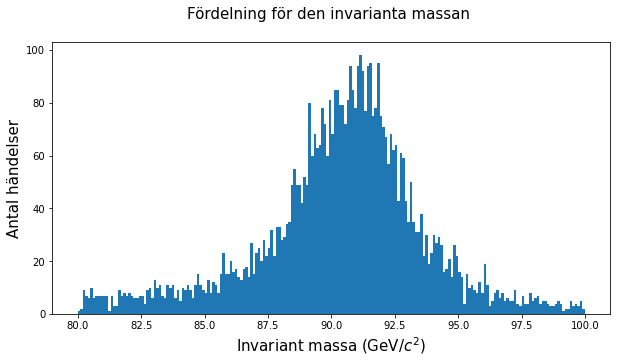

In [43]:
# Vi vill skilja ut området mellan 80 och 100 GeV. Det är möjligt att göra
# med hjälp av range-parametern när vi ritar histogramet, men vi förenklar koden
# ur datorns perspektiv om vi begränsar datan istället.


topp = tvillingmyoner[(tvillingmyoner.M >= 80) & (tvillingmyoner.M <= 100)]


fig = plt.figure(figsize = (10,5))
plt.hist(topp.M, bins = 200, range = (80,100))

plt.xlabel('Invariant massa (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Antal händelser', fontsize = 15)
plt.title('Fördelning för den invarianta massan \n', fontsize = 15 ) 

plt.show()

Icke-linjära anpassningar kan vara lite mer krävande än den linjära som vi gjorde tidigare, men i Python hittar man oftast de verktyg som behövs. Grafen ovan kan anpassas till en normalfördelningskurva:

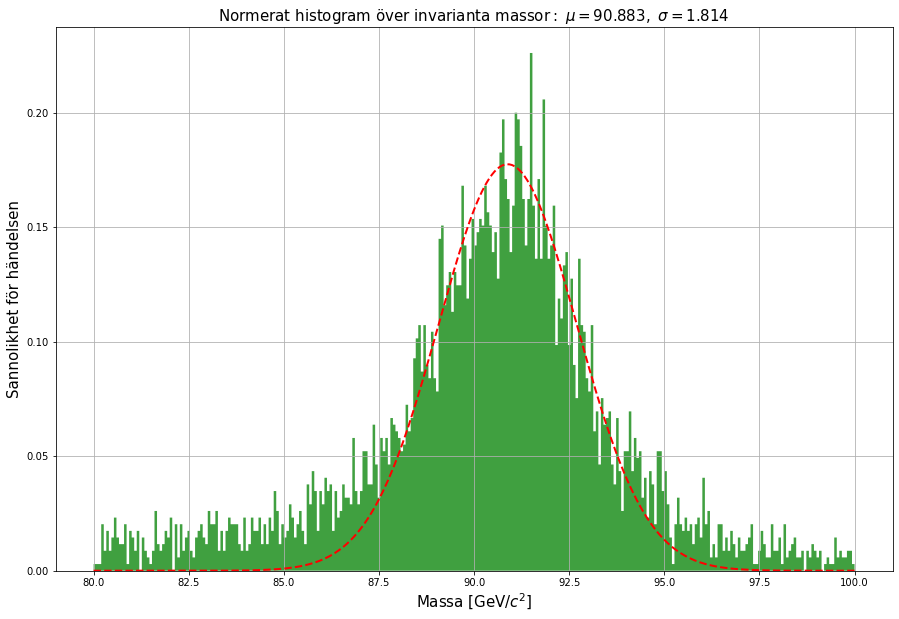

In [44]:
# Vi kan börja med att bestämma gränserna för anpassningen. Det är bra att definiera dem skilt, så att man inte behöver
# söka genom koden i efterhand för att ändra något.

nedre_grans = 87
ovre_grans = 95

deldata = tvillingmyoner[(tvillingmyoner.M > nedre_grans) & (tvillingmyoner.M < ovre_grans)]

fig = plt.figure(figsize=(15, 10))

# Här bestämmer vi gränser för den data som ska visas. Vi gör det området lite större än anpassningens område.

nedre_visning = 80
ovre_visning = 100

omrade = tvillingmyoner[(tvillingmyoner.M > nedre_visning) & (tvillingmyoner.M < ovre_visning)]

# Eftersom vi har valt olika intervall för anpassningen och visningsdatan måste vi lägga till en skalakoefficient.

koeff = len(deldata)/len(omrade)
(mu, sigma) = norm.fit(deldata.M)  # anpassar en normalfördelningskurva till datan, och sparar kurvans information
                                   #  i variablerna mu och sigma.

# Vi ritar ett histogram från den ursprungliga datan

n, bins, patches = plt.hist(tvillingmyoner.M, 300, density = 1, facecolor = 'green', alpha=0.75, histtype='stepfilled',
                            range=(nedre_visning,ovre_visning))

# Vi ritar normalfördelningsgrafen med skalakoefficienten.

y = koeff*norm.pdf(bins, mu, sigma)      
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Massa [GeV/$c^2$]',fontsize=15)
plt.ylabel('Sannolikhet för händelsen', fontsize=15)

# Allt det här verkar lite rörigt. Om du vill göra en liknande sak i din kod är det kanske enklast att
# kopiera den här koden och byta ut värden.

plt.title(r'$\mathrm{Normerat\ histogram\ över\ invarianta\ massor:}\ \mu=%.3f,\ \sigma=%.3f$'
          %(mu,sigma),fontsize=15)

# plt.grid kan användas för att lägga till ett rutnät över grafen.

plt.grid(True)

plt.show()

Man kan också skapa en graf från en fil som inte innehåller siffror. Vi tar Londons trafikolycksstatistik som exempel:

In [45]:
# Här hittas statistik från 40 000+ fordon i olyckor. Flera fordon i samma olycka har samma referensnummer, AREFNO.

trafik = pd.read_table('http://roads.data.tfl.gov.uk/AccidentStats/Prod/2016-gla-data-extract-vehicle.csv', sep = ",")
skadade = pd.read_table('http://roads.data.tfl.gov.uk/AccidentStats/Prod/2016-gla-data-extract-casualty.csv', sep = ",")
print(len(trafik))

44773


In [46]:
trafik.head()

,AREFNO,Borough,Boro,Easting,Northing,Vehicle Ref.,Vehicle Type,Vehicle Type (Banded),Vehicle Manoeuvres,Vehicle Skidding,...,Junction Location,Object in C/W,Veh. Leaving C/W,Veh. off C/W,Veh. Impact,VJNYPURP DECODED,Driver Sex,Driver Age,Driver Age (Banded),
0,1160001090,CITY OF LONDON,0,531350,181580,1,08 Taxi,4 Taxi,04 Slowing Or Stopping,0 No Skidding/Overturn,...,0 Not At Jct,00 None,0 Did Not Leave,00 None,4 N/S Hit First,1 Jny Part of Work,1 Male,46,35-64,
1,1160002980,CITY OF LONDON,0,532780,180410,1,01 Pedal Cycle,1 Pedal cycle,13 Overtake Move Veh O/S,0 No Skidding/Overturn,...,0 Not At Jct,00 None,0 Did Not Leave,00 None,1 Front Hit First,5 Other/Not Known,3 Not Traced,0,Unknown,
2,1160002980,CITY OF LONDON,0,532780,180410,2,01 Pedal Cycle,1 Pedal cycle,14 Overtake Stat Veh O/S,0 No Skidding/Overturn,...,0 Not At Jct,00 None,0 Did Not Leave,00 None,2 Back Hit First,5 Other/Not Known,1 Male,46,35-64,
3,1160006347,CITY OF LONDON,0,531400,181570,1,09 Car,3 Car,09 Turning Right,0 No Skidding/Overturn,...,8 Jct Mid,00 None,0 Did Not Leave,00 None,1 Front Hit First,5 Other/Not Known,1 Male,22,17-24,
4,1160006347,CITY OF LONDON,0,531400,181570,2,09 Car,3 Car,05 Moving Off,0 No Skidding/Overturn,...,8 Jct Mid,00 None,0 Did Not Leave,00 None,3 O/S Hit First,5 Other/Not Known,1 Male,69,65+,


In [47]:
skadade.head()

,AREFNO,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
0,1160001090,CITY OF LONDON,0,531350,181580,1,3 Pedestrian,1 Male,25-59,54,1,3 Slight,09 In Road - Not Crossing,7 In Rd Facing Traffic,1 Pedestrian,
1,1160002980,CITY OF LONDON,0,532780,180410,1,1 Driver/Rider,1 Male,25-59,46,1,2 Serious,-2 Unknown,-2 N/A,2 Pedal Cycle,
2,1160006347,CITY OF LONDON,0,531400,181570,3,2 Passenger,2 Female,60+,61,1,3 Slight,-2 Unknown,-2 N/A,4 Car,
3,1160006347,CITY OF LONDON,0,531400,181570,2,1 Driver/Rider,1 Male,60+,69,1,3 Slight,-2 Unknown,-2 N/A,4 Car,
4,1160006347,CITY OF LONDON,0,531400,181570,1,1 Driver/Rider,1 Male,16-24,22,1,3 Slight,-2 Unknown,-2 N/A,4 Car,


In [48]:
# Vi skiljer ut ett åldersspann ut datan och undersöker det.

nedre_grans = 16
ovre_grans = 25
aldersspann = trafik.loc[(trafik['Driver Age'] <= ovre_grans) & (trafik['Driver Age'] >= nedre_grans)]

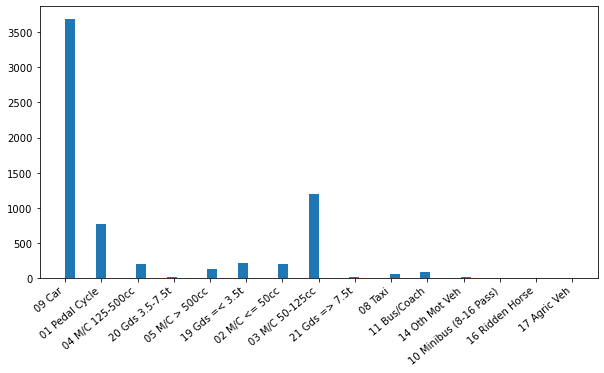

In [49]:
# Vi skapar ett diagram som visar den här åldersgruppens olyckor med olika fordon.

fig = plt.figure(figsize = (10,5))
plt.hist(aldersspann['Vehicle Type'],bins=50)

# Vi ändrar horisontalaxelns markeringar för att göra diagrammet tydligare.

plt.xticks(rotation = 40, ha = 'right') # rotation = 40 vrider texten 40 grader.
                                        # ha (horizontal alignment) gör det tydligare var textens stapel står.

plt.show()

Diagrammet visar, föga förvånande, att största delen av olyckorna sker med bil. Vi ser dock att ett av "fordonen" på listan är Ridhäst. Vi ska ta en närmare titt på det: 

In [50]:
# Vi skiljer ut hästkrockarna ur olycksdatan.

ridhast = trafik.loc[trafik['Vehicle Type'] == '16 Ridden Horse']
ridhast.head()

,AREFNO,Borough,Boro,Easting,Northing,Vehicle Ref.,Vehicle Type,Vehicle Type (Banded),Vehicle Manoeuvres,Vehicle Skidding,...,Junction Location,Object in C/W,Veh. Leaving C/W,Veh. off C/W,Veh. Impact,VJNYPURP DECODED,Driver Sex,Driver Age,Driver Age (Banded),
33056,0116TW60237,RICHMOND-UPON-THAMES,24,518450,173770,1,16 Ridden Horse,8 Other,18 Going Ahead Other,0 No Skidding/Overturn,...,2 Jct Cleared,00 None,0 Did Not Leave,00 None,1 Front Hit First,1 Jny Part of Work,1 Male,25,25-34,
33057,0116TW60237,RICHMOND-UPON-THAMES,24,518450,173770,2,16 Ridden Horse,8 Other,18 Going Ahead Other,0 No Skidding/Overturn,...,2 Jct Cleared,00 None,0 Did Not Leave,00 None,2 Back Hit First,1 Jny Part of Work,1 Male,28,25-34,


In [51]:
# Vi märker att de har samma AREFNO. Hästarna krockade med varandra.
# Vi tar hjälp av skadestatistiken för att se följderna av kollisionen.

ridskador = skadade.loc[skadade['AREFNO'] == '0116TW60237']
ridskador.head()

# Protip: Om man vill använda stora datafiler smidigt kan man också automatisera sökandet. 
# Istället för att skriva in referenskoden manuellt kan man skriva en funktion som hämtar den ur tabellen.
# Testa själv om du är intresserad.

,AREFNO,Borough,Boro,Easting,Northing,CREFNO,Casualty Class,Casualty Sex,Casualty Age (Banded),Casualty Age,No. of Casualties,Casualty Severity,Ped. Location,Ped. Movement,Mode of Travel,
22096,0116TW60237,RICHMOND-UPON-THAMES,24,518450,173770,1,1 Driver/Rider,1 Male,25-59,28,1,3 Slight,-2 Unknown,-2 N/A,8 Other Vehicle,


Ett litet tilläggsord om felberäkningar: I verkliga mätningar behöver man alltid fråga sig vad som är noggranna mätningar, och hur noggrant man egentligen kan mäta något. Dessa noggrannhetsvärden kan avgöras på basis av anpassnings- eller mätprocessen, och ibland kan tillförlitligheten variera från datapunkt till datapunkt. Vi gör ett exempel på det.

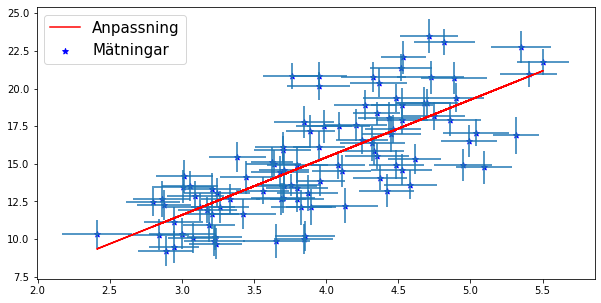

In [53]:
def normalslump(a):
    b = a.copy()
    for i in range(0,len(b)):
        b[i] = b[i]*rand.normalvariate(1, 0.1)
    return b;

# Vi skapar "mätdata" med normalfördelade variationer.

data1 = normalslump(np.linspace(3,5,100))
data2 = normalslump(np.linspace(10,20,100))

# Vi ger varje mätpunkt slumpmässiga felgränser.

fel1 = (1/5)*normalslump(np.ones(len(data1)))
fel2 = normalslump(np.ones(len(data2)))

fig = plt.figure(figsize=(10,5))
plt.scatter(data1, data2, marker ='*', color = 'b', label = 'Mätningar')
plt.errorbar(data1, data2, xerr = fel1, yerr = fel2, fmt = 'none')

# Vi beräknar också en linjär anpassning till våra värden, och ritar ut linjen 

slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)
plt.plot(data1, intercept + slope*data1, 'r', label='Anpassning')

plt.legend(fontsize = 15)
plt.show()

### 7. Skapa animationer

Med Python kan man skapa många olika typer av animationer. Vi rekommenderar inte att använda plotly-paketet i Notebooks, eftersom det går alldeles för långsamt. Här gör vi ett exempel som på ett trevligt sätt visar varför mera data ger bättre värden.

In [54]:
data = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

iMass = data.M

In [55]:
# Vi skapar en funktion som kan producera en bild. Variabeln num bestämmer hur många steg animationen ska gå i,
#  och i varje steg ritas ett nytt histogram.

def updt_hist(num, iMass):
    plt.cla()                  # Tar bort tidigare information om grafens axlar
    axes = plt.gca()           # Skapar ny information om grafens axlar
    axes.set_ylim(0,8000)      # Bestämmer gränser för axlarna
    axes.set_xlim(0,200)
    plt.hist(iMass[:num*480], bins = 120)

Obs: Celler som producerar animationer är _**långsamma**_. Ju fler bilder de behöver gå igenom, desto långsammare körs de. Den här animationen är simpel, men kan ta några minuter.

In [56]:
# Vi importear ett paket för animationer

import matplotlib.animation

In [59]:
%%capture

# capture-magic hindrar den här cellen från att visa något resultat. Det är bra för att göra koden lättare.
# Vi visar animationen med nästa cell.

fig = plt.figure()

anim = matplotlib.animation.FuncAnimation(fig, updt_hist, frames = 200, fargs=(iMass, ) )

# anim.to_jshtml() ändrar animationen (javascript) till html, så att Notebook kan visa den.

from IPython.display import HTML
HTML(anim.to_jshtml())

In [58]:
# TDet här kommandot visar animationen, om den finns i programmets minne.

HTML(anim.to_jshtml())

### 8. Kartor och täthetskartor

interaktiva kartor som kan ta in data från en Notebook? Ja tack!

Det här är lättare än man skulle anta. I de här exemplen ser vi hur det fungerar när vi har data som innehåller positionskoordinater.

In [61]:
# Folium-paketet ger oss kartbottnar.

import folium

# HeatMap-systemet som hör till Folium kan färgkoda täthetsgrader.
# Kom ihåg skillnaden på stora och små bokstäver.

from folium.plugins import HeatMap

ModuleNotFoundError: No module named 'folium'

In [62]:
# Vi tar in denna datafil, som innehåller kontinuerligt uppdaterad information
# om jordbävningar på olika ställen i världen under senaste månaden.
# Den kan t.o.m innehålla dagens jordbävningar.

quakeData = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')
quakeData.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-03-04T10:03:52.732Z,57.622800,-156.840100,137.10,2.50,ml,NaN,NaN,NaN,0.99,...,2021-03-04T10:09:29.007Z,"35 km ENE of Ugashik, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
1,2021-03-04T09:42:35.740Z,38.821999,-122.786499,1.67,0.66,md,17.0,40.0,0.009838,0.03,...,2021-03-04T09:57:06.081Z,"6km W of Cobb, CA",earthquake,0.24,0.45,0.500,3.0,automatic,nc,nc
2,2021-03-04T09:36:16.650Z,39.736400,22.129600,10.00,4.60,mwr,NaN,36.0,0.459000,0.62,...,2021-03-04T10:06:42.040Z,"13 km NNE of Grizáno, Greece",earthquake,5.90,1.90,0.098,10.0,reviewed,us,us
3,2021-03-04T09:25:16.630Z,33.706333,-116.713000,17.75,0.91,ml,31.0,87.0,0.040030,0.21,...,2021-03-04T09:29:03.701Z,"4km S of Idyllwild, CA",earthquake,0.40,0.64,0.197,28.0,automatic,ci,ci
4,2021-03-04T09:10:38.070Z,38.800167,-122.733666,1.54,1.51,md,31.0,56.0,0.017070,0.06,...,2021-03-04T09:26:05.906Z,"3km SSW of Cobb, CA",earthquake,0.26,0.42,0.080,9.0,automatic,nc,nc


In [ ]:
# Vår data är i DataFrame-format (tabell). Vi behöver ändra om det till listor, som HeatMap kan tolka.

# Vi skapar en tillräckligt lång lista där vi kan spara önskade värden.

dat = [0]*len(quakeData) # Skapar en lista med nollor

# De värden som vi för in i listan innehåller latitud, longitud och jordbävningens magnitud.
# Ett sådant värde, som består av ett flertal värden, kallas "tuple"

for i in range(0, len(quakeData)):
    dat[i] = [quakeData['latitude'][i], quakeData['longitude'][i], quakeData['mag'][i]]
# For-loopen byter ut alla nollor i dat-variabeln mot tuples innehållande informationen vi behöver.

In [ ]:
# Det finns en risk att några magnituder är okända. Vi behöver i så fall
#  ta bort de raderna som inte innehåller siffervärden, så att de inte ställer till det för oss.
# Vi tar bort alla NaN-värden (not a number)

dat = [x for x in dat if ~np.isnan(x[2])]
# Vi definierar om dat, så att den inte innehåller de värden där element 2 i tuplen är NaN.
# Minns att ordningstal börjar från 0, så x[0] skulle vara latitud, x[1] longitud och x[2] magnitud.

Olika kartstilar hittas [på denna länk](https://deparkes.co.uk/2016/06/10/folium-map-tiles/).

Använd parametern **world_copy_jump = True** för att göra det möjligt att dra kartan utan att informationen slutar synas.

Om du vill att kartan ska ha gränser, använd parametern **no_wrap = True**

Parametern **control_scale** lägger till en skalamarkör.

In [ ]:
m = folium.Map([15., -75.], tiles='openstreetmap', zoom_start=3, world_copy_jump = True, control_scale = True)

HeatMap(dat, radius = 15).add_to(m)

m

### 9. Problem? Se hit!

**Innehåll:**

Buhuu, jag kan inte!

Jag försökte köra en cell, men den blir inte klar och ritar inte ut min figur.

Felmeddelandet säger att "variabel is not defined" eller "variabel does not exist"

Jag försöker ändra en variabel, men print(variabel) ger resultatet "None"

Min Datafil vill inte ladda in

I datan jag laddat in finns NaN-värden.

Jag slog ihop flera delar av min data till samma variabel, men nu fungerar inte min nya variabel.

Min kod fungerar inte, fastän den alldeles säkert är rätt skriven.

Datan innehåller datum, som krånglar till formatet. Hur fixa?

Jag kopierade data till en ny variabel, men efter det har originalvariabeln ändrats.

#### Buhuu, jag kan inte!

Ingen panik, ingen är född mästare. Man lär sig genom att försöka och misslyckanden hör till processen.
En fördel med Python är den stora användarskaran: Vad du än kan tänka dig behöva veta är du knappast den första, och oftast hittar du svar på dina frågor genom en snabb googling. Forumet [StackExchange](https://stackexchange.com/) har troligen svaren på dina problem. I den här listan hittar du också svar på några vanliga frågor.

#### Jag försökte köra en cell, men den blir inte klar och ritar inte ut min figur.

Om cellen inte ska köra några komplicerade operationer så borde det inte ta mer än ett par sekunder att köra den. I såna fall kanske koden innehåller en loop som inte avslutas. Du kan stoppa kerneln och försöka köra koden igen med små ändringar. Om du inte hittar problemet, testa med en enklare syntax tills du är säker på att funktionerna i koden fungerar som du förväntar dig.

#### Felmeddelandet säger att "variabel is not defined" eller "variabel does not exist"

Variabeln som koden refererar till har inte blivit definierad. Är du säker på att du har kört den cell som ska definiera variabeln?
Kontrollera också att variabeln är korrekt skriven. Python gör skillnad på stora och små bokstäver.

#### Jag försöker ändra en variabel, men print(variabel) ger resultatet "None"

Det är troligen något fel med hur du sparar informationen. Kom ihåg att alltid definiera variabeln när du ändrar den. Exempel:

```python
variabel = 3
variabel = variabel*2
print(variabel)
```
Denna kod skriver ut värdet på *variabel*, som är 6.

Felexempel:
```python
variabel = 3
variabel*2
print(variabel)
```
Denna kod skriver ut värdet 3, eftersom man inte har definierat om *variabel*.

#### Min Datafil vill inte ladda in

Vanliga csv- eller motsvarande textfiler kan öppnas och undersökas med hjälp av ett vanligt textbehandlingsprogram. Du kan kontrollera vilka tecken som separerar värdena, på vilka rader den relevanta datan hittas eller om filen över huvud taget innehåller det du väntat dig. 

Separationstecken, titelrader och annat kan bestämmas med hjälp av inläsningsfunktionens parametrar.


```python
pd.read_csv('länk till filen', sep = ';')
```
Den här koden läser in en csv-fil där värdena separeras med semikolon.


**pd.read_table()** kan hjälpa dig undersöka Datans format om du inte vill öppna den i ett annat program.

Ibland beror problemet på att fien innehåller tecken som inte kan tolkas med grundinställningarna. Då kan parametern **encoding** vara till hjälp. Du hittar mer info om parametern och olika teckenpaket [här](https://docs.python.org/3/library/codecs.html#standard-encodings). Om inte grundinställningen duger, fungerar oftast någon ISO-variant.

#### I datan jag laddat in finns NaN-värden.

NaN, 'Not a Number', innebär att den här datan har ett värde som inte kan tolkas. Det kan innebära att värdet är odefinierat (t.ex. kvadratroten av ett negativt tal) eller att värdet bara saknas. 

Många funktioner ignorerar NaN-värden (eller så kan parametrarna ändras så att de ignorerar dem). Det här är praktiskt när man går igenom stora datafiler. Annars kan alla möjliga småfel göra att koden hakar upp sig.

#### Jag slog ihop flera delar av min data till samma variabel, men nu fungerar inte min nya variabel.


Kombinerade du olika typer av variabler? Programmet gör skillnad på heltalsvariabler, *integer*, decimaltal, *float*, och text, *string*.
Ibland kan en sifferserie bland datan vara definierad som en *string*, och det kan ställa till med problem när man ska göra beräkningar. Python har en del kontrollkommandon med hjälp av vilka man kan kontrollera variabelns format:

```python
# Vi kontrollerar om variabeln test_string är string med hjälp av type() 
  
# Vi skapar variabeln    
test_string = "404"

# Vi kontrollerar om variabeln är av typen string. Variabeln "kontroll" får värdet true eller false
kontroll=type(test_string) == str
  
# Vi skriver ut resultatet 
print("Variabeln är ", test_string, ". Är variabeln en string?")
print(kontroll)
```
Koden skriver ut:

Variabeln är  404 . Är variabeln en string?
True

Eller har du satt ihop flera sifferserier och vill ha dem som kolumner, men fick istället alla serier i en lång rad? Du kan kontrollera om så är fallet med hjälp av kommandona **len(variabel)** och **nimi.head()**

```python
# Vi skapar två listor
test1 = (1, 2, 3, 4)
test2 = (5, 6, 7, 8)

# Vi slår ihop båda listorna till en och räknar elementen
combo = test1 + test2
print(combo)
print("Variabeln är", len(combo),"celler lång")

# Vi slår ihop listorna som två kolumner och räknar elementen
combo = [test1, test2]
print(combo)
print("Variabeln är", len(combo),"celler lång")
```
(1, 2, 3, 4, 5, 6, 7, 8)
Variabeln är 8 celler lång
(1, 2, 3, 4), (5, 6, 7, 8)
Variabeln är 2 celler lång

#### Min kod fungerar inte, fastän den alldeles säkert är rätt skriven.

Kontollera en extra gång att du inte saknar något kommatecken eller har fel case på bokstäverna.
Om koden faktiskt är felfri och ändå inte fungerar så kan felet bero på att *kernel*n har sparat någon information som stör. I Kernel-menyn kan du då välja **Restart & Clear Output** och köra alla kodceller igen.

#### Datan innehåller datum, som krånglar till formatet. Hur fixa?

Datum kommer i många former, och kan ställa till det. Om originalinställningarna inte kan tolka det prydligt, så kan du hitta tips i [dokumentationen](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) för **pd.read_csv()**. Exempelvis **dayfirst** eller **date_parser** kan vara till hjälp. I Python finns också paketet [**time**](https://docs.python.org/3/library/time.html), där man kan hitta rätt verktyg.

#### Jag kopierade data till en ny variabel, men efter det har originalvariabeln ändrats.

Variabler i python använder hänvisningar. Det innebär att variabeln egentligen bara sparar information om var dess värde hittas, inte själva värdet. Om du har kopierat en variabel till en annan (ex. *kopiaavinfo = info*) kan det ibland hända att den bara hänvisar till den andra variabeln. När du sedan ändrar den nya variabeln kan båda ändras. Ett bra sätt att komma undan detta när man kopierar en variabel är:

```python
kopiaavinfo = info.copy()
```
Då kommer inte den nya variabeln att i misstag hänvisa till den gamla.
Det här problemet brukar märkligt nog bara uppkomma när man kopierar hela datasets. Om man bara kopierar enskilda kolumner fungerar det som det ska.